In [49]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [50]:
train_df = pd.read_csv('train_df2.csv', index_col=0)
train_df.drop(['star_rating', 'pos_corpus', 'neg_corpus', 'pos_1', 'pos_2', 'pos_3', 
               'neg_1', 'neg_2', 'neg_3', 'prod_corpus', 'word_1', 'word_2', 'word_3'], axis=1, inplace=True)
train_df.drop(['cust_total_votes_mean', 'cust_total_votes_std', 'cust_helpful_votes_mean', 'cust_helpful_votes_std', 
               'prod_total_votes_mean', 'prod_total_votes_std', 'prod_helpful_votes_mean', 'prod_helpful_votes_std'], 
              axis=1, inplace=True)

train_df['avg_pos_word'] = train_df.apply((lambda x: (x.pos_1_word_1 + x.pos_1_word_2 + x.pos_1_word_3 +
                                                      x.pos_2_word_1 + x.pos_2_word_2 + x.pos_2_word_3 +
                                                      x.pos_3_word_1 + x.pos_3_word_2 + x.pos_3_word_3) / 9), axis=1)
train_df['avg_neg_word'] = train_df.apply((lambda x: (x.neg_1_word_1 + x.neg_1_word_2 + x.neg_1_word_3 +
                                                      x.neg_2_word_1 + x.neg_2_word_2 + x.neg_2_word_3 +
                                                      x.neg_3_word_1 + x.neg_3_word_2 + x.neg_3_word_3) / 9), axis=1)
train_df.drop(['pos_1_word_1', 'pos_1_word_2', 'pos_1_word_3', 'pos_2_word_1',
               'pos_2_word_2', 'pos_2_word_3', 'pos_3_word_1', 'pos_3_word_2',
               'pos_3_word_3', 'neg_1_word_1', 'neg_1_word_2', 'neg_1_word_3',
               'neg_2_word_1', 'neg_2_word_2', 'neg_2_word_3', 'neg_3_word_1',
               'neg_3_word_2', 'neg_3_word_3'], axis=1, inplace=True)

train_df.head()

,customer_id,product_parent,positive,cust_review_count,cust_star_rating_mean,cust_star_rating_std,prod_review_count,prod_star_rating_mean,prod_star_rating_std,pos_sim,neg_sim,avg_pos_word,avg_neg_word
0,1617361,849246716,1,5,5.000000,0.000000,297,4.872054,0.363625,0.033451,0.000000,0.308559,0.000000
1,53052607,849246716,0,5,3.600000,0.547723,297,4.872054,0.363625,0.012478,0.009009,0.096724,0.169741
2,15679577,849246716,1,8,3.375000,1.505941,297,4.872054,0.363625,0.007220,0.033333,0.067060,0.093065
3,16367779,849246716,1,9,4.444444,0.527046,297,4.872054,0.363625,0.095238,0.000000,-0.077627,0.000000
4,25485198,849246716,1,17,5.000000,0.000000,297,4.872054,0.363625,0.010870,0.000000,0.368011,0.000000


In [51]:
train_df.columns

Index(['customer_id', 'product_parent', 'positive', 'cust_review_count',
       'cust_star_rating_mean', 'cust_star_rating_std', 'prod_review_count',
       'prod_star_rating_mean', 'prod_star_rating_std', 'pos_sim', 'neg_sim',
       'avg_pos_word', 'avg_neg_word'],
      dtype='object')

In [52]:
train_df.groupby('positive').size()

positive
0     9531
1    38191
dtype: int64

In [53]:
train_df.groupby('positive').size() / len(train_df)

positive
0    0.199719
1    0.800281
dtype: float64

In [54]:
len(train_df[train_df.positive == 1]) / len(train_df)

0.8002807929256947

In [55]:
test_df = pd.read_csv('test_df2.csv', index_col=0)
test_df.drop(['star_rating', 'pos_corpus', 'neg_corpus', 'pos_1', 'pos_2', 'pos_3', 
               'neg_1', 'neg_2', 'neg_3', 'prod_corpus', 'word_1', 'word_2', 'word_3'], axis=1, inplace=True)
test_df.drop(['cust_total_votes_mean', 'cust_total_votes_std', 'cust_helpful_votes_mean', 'cust_helpful_votes_std', 
               'prod_total_votes_mean', 'prod_total_votes_std', 'prod_helpful_votes_mean', 'prod_helpful_votes_std'], 
              axis=1, inplace=True)

test_df['avg_pos_word'] = test_df.apply((lambda x: (x.pos_1_word_1 + x.pos_1_word_2 + x.pos_1_word_3 +
                                                      x.pos_2_word_1 + x.pos_2_word_2 + x.pos_2_word_3 +
                                                      x.pos_3_word_1 + x.pos_3_word_2 + x.pos_3_word_3) / 9), axis=1)
test_df['avg_neg_word'] = test_df.apply((lambda x: (x.neg_1_word_1 + x.neg_1_word_2 + x.neg_1_word_3 +
                                                      x.neg_2_word_1 + x.neg_2_word_2 + x.neg_2_word_3 +
                                                      x.neg_3_word_1 + x.neg_3_word_2 + x.neg_3_word_3) / 9), axis=1)
test_df.drop(['pos_1_word_1', 'pos_1_word_2', 'pos_1_word_3', 'pos_2_word_1',
               'pos_2_word_2', 'pos_2_word_3', 'pos_3_word_1', 'pos_3_word_2',
               'pos_3_word_3', 'neg_1_word_1', 'neg_1_word_2', 'neg_1_word_3',
               'neg_2_word_1', 'neg_2_word_2', 'neg_2_word_3', 'neg_3_word_1',
               'neg_3_word_2', 'neg_3_word_3'], axis=1, inplace=True)
test_df.head()

,customer_id,product_parent,positive,cust_review_count,cust_star_rating_mean,cust_star_rating_std,prod_review_count,prod_star_rating_mean,prod_star_rating_std,pos_sim,neg_sim,avg_pos_word,avg_neg_word
0,36330222,986428010,1,24,4.291667,1.267629,18,4.333333,1.188177,0.070423,0.012295,-0.031375,-0.011993
1,24360083,986428010,1,23,4.347826,1.191206,18,4.333333,1.188177,0.095361,0.049808,0.933571,0.547893
2,28891040,437083384,1,10,4.500000,0.707107,407,4.503686,0.887439,0.006944,0.005208,0.172577,0.136230
3,52449052,437083384,0,5,3.400000,1.516575,407,4.503686,0.887439,0.010390,0.059514,0.250885,0.003912
4,27192976,437083384,1,6,4.666667,0.816497,407,4.503686,0.887439,0.012942,0.003460,0.039631,-0.029838


In [56]:
test_df.groupby('positive').size()

positive
0     3573
1    12262
dtype: int64

In [57]:
len(test_df[test_df.positive == 1]) / len(test_df)

0.774360593621724

In [58]:
train_x, train_y = train_df.drop('positive', axis=1), train_df['positive']
test_x, test_y = test_df.drop('positive', axis=1), test_df['positive']

In [59]:
is_NaN = train_df.isnull()
row_has_NaN = is_NaN.any(axis=1)
train_df[row_has_NaN]

,customer_id,product_parent,positive,cust_review_count,cust_star_rating_mean,cust_star_rating_std,prod_review_count,prod_star_rating_mean,prod_star_rating_std,pos_sim,neg_sim,avg_pos_word,avg_neg_word


In [60]:
def evaluate(m, x, test):
    correct = 0
    pos_count = 0
    matrix = [0, 0, 0, 0]
    preds = m.predict(x)
    for i in range(len(test)):
        if (preds[i] > 0.5):
            pos_count += 1
        if (preds[i] > 0.5 and test.iloc[i] > 0.5):
            correct += 1
            matrix[0] += 1
        elif (preds[i] <= 0.5 and test.iloc[i] <= 0.5):
            correct += 1
            matrix[1] += 1
        elif (preds[i] > 0.5 and test.iloc[i] <= 0.5):
            matrix[2] += 1
        elif (preds[i] <= 0.5 and test.iloc[i] > 0.5):
            matrix[3] += 1

    pos_f1 = 2 * ((matrix[0] / pos_count) * (matrix[0] / len(test_df[test_df.positive == 1]))) / ((matrix[0] / pos_count) + (matrix[0] / len(test_df[test_df.positive == 1])))
    neg_f1 = 2 * ((matrix[1] / (matrix[1] + matrix[3])) * (matrix[1] / (len(test_df[test_df.positive == 0])))) / ((matrix[1] / (matrix[1] + matrix[3])) + (matrix[1] / (len(test_df[test_df.positive == 0]))))
    print('Correct:', correct, correct / len(test_df))
    print('Pos:', pos_count, pos_count / len(test_df))
    print('True Positive:', matrix[0], matrix[0] / len(test_df))
    print('True Negative:', matrix[1], matrix[1] / len(test_df))
    print('False Positive:', matrix[2], matrix[2] / len(test_df))
    print('False Negative:', matrix[3], matrix[3] / len(test_df))
    print('Positive Precision:', matrix[0] / pos_count)
    print('Positive Recall:', matrix[0] / len(test_df[test_df.positive == 1]))
    print('Positive F1 Score:', pos_f1)
    print('Negative Precision:', matrix[1] / (matrix[1] + matrix[3]))
    print('Negative Recall:', matrix[1] / (len(test_df[test_df.positive == 0])))
    print('Negative F1 Score:', neg_f1)

In [61]:
drop_cols = ['customer_id', 'product_parent', 'cust_review_count', 'prod_review_count', 
             'cust_star_rating_std', 'prod_star_rating_std']
             #'neg_1_word_1', 'neg_1_word_2', 'neg_1_word_3',
             #'neg_2_word_1', 'neg_2_word_2', 'neg_2_word_3', 
             #'neg_3_word_1', 'neg_3_word_2', 'neg_3_word_3']

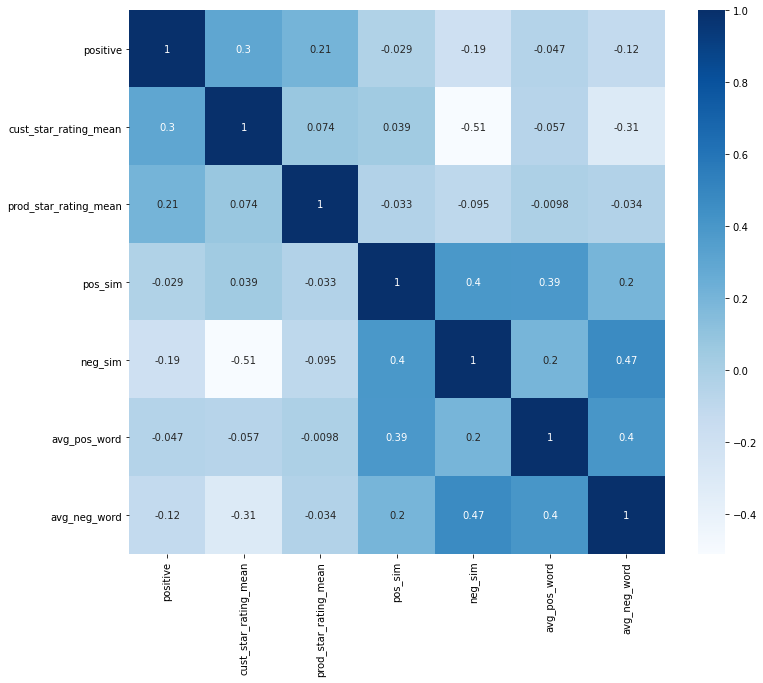

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = train_df.drop(drop_cols, axis=1).corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(train_x.drop(drop_cols, axis=1), train_y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [64]:
gb.score(test_x.drop(drop_cols, axis=1), test_y)

0.7929902115566783

In [65]:
evaluate(gb, test_x.drop(drop_cols, axis=1), test_y)

Correct: 12557 0.7929902115566783
Pos: 14452 0.9126618250710452
True Positive: 11718 0.7400063151247237
True Negative: 839 0.05298389643195453
False Positive: 2734 0.17265550994632145
False Negative: 544 0.03435427849700032
Positive Precision: 0.8108220315527263
Positive Recall: 0.9556352960365356
Positive F1 Score: 0.8772928052706446
Negative Precision: 0.6066522053506869
Negative Recall: 0.23481668066050937
Negative F1 Score: 0.3385794995964487


In [66]:
rf = RandomForestClassifier(n_estimators=1000, criterion='entropy', n_jobs=-1)
rf.fit(train_x.drop(drop_cols, axis=1), train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [67]:
rf.score(test_x.drop(drop_cols, axis=1), test_y)

0.7862961793495421

In [68]:
evaluate(rf, test_x.drop(drop_cols, axis=1), test_y)

Correct: 12451 0.7862961793495421
Pos: 14232 0.898768550678876
True Positive: 11555 0.729712661825071
True Negative: 896 0.056583517524471105
False Positive: 2677 0.16905588885380488
False Negative: 707 0.04464793179665298
Positive Precision: 0.81190275435638
Positive Recall: 0.9423421954004241
Positive F1 Score: 0.8722729674643315
Negative Precision: 0.5589519650655022
Negative Recall: 0.2507696613490064
Negative F1 Score: 0.34621329211746515


<BarContainer object of 6 artists>

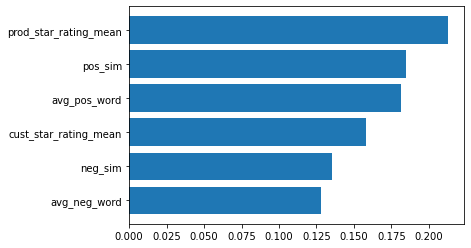

In [69]:
imp_tuples = sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), 
                 train_x.drop(drop_cols, axis=1).columns), reverse=False)
imp = [t[0] for t in imp_tuples]
labl = [t[1] for t in imp_tuples]
plt.barh(labl, imp, linewidth=5)

In [70]:
rf2 = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
rf2.fit(train_x.drop(drop_cols, axis=1), train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [71]:
rf2.score(test_x.drop(drop_cols, axis=1), test_y)

0.10023450014771729

In [72]:
evaluate(rf2, test_x.drop(drop_cols, axis=1), test_y)

Correct: 12357 0.7803599621092516
Pos: 14040 0.8866435112093464
True Positive: 11412 0.720682033470161
True Negative: 945 0.05967792863909062
False Positive: 2628 0.16596147773918535
False Negative: 850 0.05367856015156299
Positive Precision: 0.8128205128205128
Positive Recall: 0.9306801500570869
Positive F1 Score: 0.8677667097559121
Negative Precision: 0.5264623955431755
Negative Recall: 0.26448362720403024
Negative F1 Score: 0.3520864381520119


<BarContainer object of 6 artists>

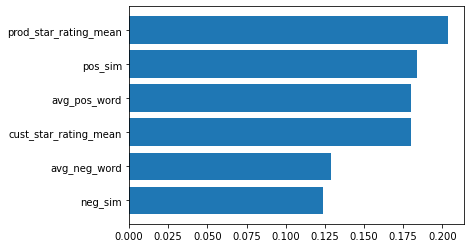

In [73]:
imp_tuples = sorted(zip(map(lambda x: round(x, 4), rf2.feature_importances_), 
                 train_x.drop(drop_cols, axis=1).columns), reverse=False)
imp = [t[0] for t in imp_tuples]
labl = [t[1] for t in imp_tuples]
plt.barh(labl, imp, linewidth=5)

In [74]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(train_x.drop(drop_cols, axis=1), train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [75]:
knn.score(test_x.drop(drop_cols, axis=1), test_y)

0.7535838332807073

In [76]:
evaluate(knn, test_x.drop(drop_cols, axis=1), test_y)

Correct: 11933 0.7535838332807073
Pos: 13374 0.8445847805494159
True Positive: 10867 0.6862646037259236
True Negative: 1066 0.06731922955478371
False Positive: 2507 0.15832017682349225
False Negative: 1395 0.08809598989580045
Positive Precision: 0.8125467324659787
Positive Recall: 0.8862338933289838
Positive F1 Score: 0.8477921672647838
Negative Precision: 0.4331572531491264
Negative Recall: 0.29834872656031347
Negative F1 Score: 0.35333112363274777


In [77]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_x.drop(drop_cols, axis=1), train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [78]:
gnb.score(test_x.drop(drop_cols, axis=1), test_y)

0.7442374486896116

In [79]:
evaluate(gnb, test_x.drop(drop_cols, axis=1), test_y)

Correct: 11785 0.7442374486896116
Pos: 12476 0.7878749605304705
True Positive: 10344 0.6532365014209031
True Negative: 1441 0.09100094726870855
False Positive: 2132 0.13463845910956743
False Negative: 1918 0.12112409220082096
Positive Precision: 0.8291118948380891
Positive Recall: 0.8435817974229326
Positive F1 Score: 0.8362842590346835
Negative Precision: 0.42899672521583804
Negative Recall: 0.40330254687937306
Negative F1 Score: 0.41575302942873626


In [80]:
from keras import models
from keras import layers
from keras import optimizers
from keras.utils import to_categorical
import keras
import numpy as np

Using TensorFlow backend.


In [81]:
keras.backend.clear_session()

In [82]:
nn_train_x = train_x.drop(drop_cols, axis=1)
nn_test_x = test_x.drop(drop_cols, axis=1)

In [83]:
np.shape(nn_train_x)

(47722, 6)

In [84]:
network = models.Sequential()
network.add(layers.Dense(6, activation='relu', input_shape=(6,)))
network.add(layers.Dense(4, activation='relu', input_shape=(6,)))
network.add(layers.Dense(1, activation='sigmoid', input_shape=(4,)))
network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 75
Trainable params: 75
Non-trainable params: 0
_________________________________________________________________


In [85]:
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
network.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

epochs = 150
history = network.fit(nn_train_x, 
                      train_y, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(nn_test_x, test_y))

Train on 47722 samples, validate on 15835 samples
Epoch 1/150
47722/47722 [==============================] - 17s 352us/step - loss: 0.6426 - accuracy: 0.7743 - val_loss: 0.6065 - val_accuracy: 0.7770
Epoch 2/150
47722/47722 [==============================] - 1s 18us/step - loss: 0.5644 - accuracy: 0.8018 - val_loss: 0.5541 - val_accuracy: 0.7767
Epoch 3/150
47722/47722 [==============================] - 1s 18us/step - loss: 0.5167 - accuracy: 0.8017 - val_loss: 0.5286 - val_accuracy: 0.7767
Epoch 4/150
47722/47722 [==============================] - 1s 18us/step - loss: 0.4938 - accuracy: 0.8018 - val_loss: 0.5200 - val_accuracy: 0.7783
Epoch 5/150
47722/47722 [==============================] - 1s 18us/step - loss: 0.4851 - accuracy: 0.8017 - val_loss: 0.5162 - val_accuracy: 0.7789
Epoch 6/150
47722/47722 [==============================] - 1s 18us/step - loss: 0.4813 - accuracy: 0.8021 - val_loss: 0.5135 - val_accuracy: 0.7788
Epoch 7/150
47722/47722 [==============================] - 1

Epoch 56/150
47722/47722 [==============================] - 1s 18us/step - loss: 0.4417 - accuracy: 0.8086 - val_loss: 0.4731 - val_accuracy: 0.7890
Epoch 57/150
47722/47722 [==============================] - 1s 18us/step - loss: 0.4417 - accuracy: 0.8085 - val_loss: 0.4667 - val_accuracy: 0.7903
Epoch 58/150
47722/47722 [==============================] - 1s 18us/step - loss: 0.4417 - accuracy: 0.8081 - val_loss: 0.4711 - val_accuracy: 0.7905
Epoch 59/150
47722/47722 [==============================] - 1s 18us/step - loss: 0.4417 - accuracy: 0.8083 - val_loss: 0.4666 - val_accuracy: 0.7910
Epoch 60/150
47722/47722 [==============================] - 1s 17us/step - loss: 0.4417 - accuracy: 0.8085 - val_loss: 0.4681 - val_accuracy: 0.7913
Epoch 61/150
47722/47722 [==============================] - 1s 18us/step - loss: 0.4417 - accuracy: 0.8085 - val_loss: 0.4665 - val_accuracy: 0.7902
Epoch 62/150
47722/47722 [==============================] - 1s 18us/step - loss: 0.4416 - accuracy: 0.8084

Epoch 111/150
47722/47722 [==============================] - 1s 17us/step - loss: 0.4415 - accuracy: 0.8085 - val_loss: 0.4678 - val_accuracy: 0.7907
Epoch 112/150
47722/47722 [==============================] - 1s 18us/step - loss: 0.4416 - accuracy: 0.8086 - val_loss: 0.4671 - val_accuracy: 0.7905
Epoch 113/150
47722/47722 [==============================] - 1s 18us/step - loss: 0.4415 - accuracy: 0.8083 - val_loss: 0.4685 - val_accuracy: 0.7909
Epoch 114/150
47722/47722 [==============================] - 1s 18us/step - loss: 0.4415 - accuracy: 0.8083 - val_loss: 0.4666 - val_accuracy: 0.7903
Epoch 115/150
47722/47722 [==============================] - 1s 18us/step - loss: 0.4415 - accuracy: 0.8082 - val_loss: 0.4666 - val_accuracy: 0.7903
Epoch 116/150
47722/47722 [==============================] - 1s 18us/step - loss: 0.4415 - accuracy: 0.8081 - val_loss: 0.4703 - val_accuracy: 0.7906
Epoch 117/150
47722/47722 [==============================] - 1s 18us/step - loss: 0.4415 - accuracy:

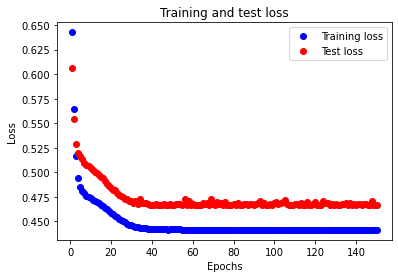

In [86]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

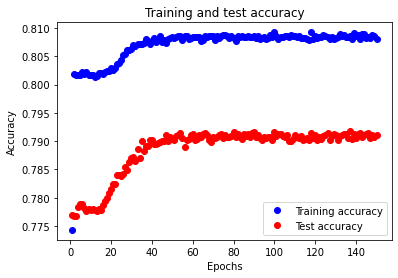

In [87]:
acc_values = history_dict['accuracy']
test_acc_values = history_dict['val_accuracy']
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [88]:
correct = 0
pos_count = 0
matrix = [0, 0, 0, 0]
preds = network.predict(nn_test_x)
for i in range(len(test_y)):
    if (preds[i] > 0.5):
        pos_count += 1
    if (preds[i] > 0.5 and test_y.iloc[i] > 0.5):
        correct += 1
        matrix[0] += 1
    elif (preds[i] <= 0.5 and test_y.iloc[i] <= 0.5):
        correct += 1
        matrix[1] += 1
    elif (preds[i] > 0.5 and test_y.iloc[i] <= 0.5):
        matrix[2] += 1
    elif (preds[i] <= 0.5 and test_y.iloc[i] > 0.5):
        matrix[3] += 1

pos_f1 = 2 * ((matrix[0] / pos_count) * (matrix[0] / len(test_df[test_df.positive == 1]))) / ((matrix[0] / pos_count) + (matrix[0] / len(test_df[test_df.positive == 1])))
neg_f1 = 2 * ((matrix[1] / (matrix[1] + matrix[3])) * (matrix[1] / (len(test_df[test_df.positive == 0])))) / ((matrix[1] / (matrix[1] + matrix[3])) + (matrix[1] / (len(test_df[test_df.positive == 0]))))
print('Correct:', correct, correct / len(test_df))
print('Pos:', pos_count, pos_count / len(test_df))
print('True Positive:', matrix[0], matrix[0] / len(test_df))
print('True Negative:', matrix[1], matrix[1] / len(test_df))
print('False Positive:', matrix[2], matrix[2] / len(test_df))
print('False Negative:', matrix[3], matrix[3] / len(test_df))
print('Positive Precision:', matrix[0] / pos_count)
print('Positive Recall:', matrix[0] / len(test_df[test_df.positive == 1]))
print('Positive F1 Score:', pos_f1)
print('Negative Precision:', matrix[1] / (matrix[1] + matrix[3]))
print('Negative Recall:', matrix[1] / (len(test_df[test_df.positive == 0])))
print('Negative F1 Score:', neg_f1)

Correct: 12528 0.7911588253868014
Pos: 14663 0.9259867382380802
True Positive: 11809 0.7457530786233028
True Negative: 719 0.04540574676349858
False Positive: 2854 0.1802336596147774
False Negative: 453 0.028607514998421218
Positive Precision: 0.8053604310168451
Positive Recall: 0.9630565976186592
Positive F1 Score: 0.8771773444753946
Negative Precision: 0.613481228668942
Negative Recall: 0.2012314581584103
Negative F1 Score: 0.3030558482613277


In [89]:
#network.save('basic_neural_net8.h5')